In [4]:
import pdfplumber
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

files=[]
path ="G:\\金融数据获取与处理\\2019公司的年报"
for root,dirs,filename in os.walk(path):
    f = filename
    files = files + f


i=0
df=pd.DataFrame([],columns=['股票简称','股票代码','法定代表人','办公地址','公司网址','电子信箱','2019年股东的净利润','2018年股东的净利润','2017年股东的净利润'])


In [5]:
for file in files:
    txt_zh=''
    with pdfplumber.open('G:\\金融数据获取与处理\\2019公司的年报\\'+file) as pdf:
        for page in pdf.pages[0:10]:
            text = page.extract_text()
            if text != None:
                txt_zh +=  text
    
    i=i+1
    a=txt_zh.find('股票简称')
    b=txt_zh.find('股票代码')
    c=txt_zh.find('公司的中文名称')
    d=txt_zh.find('公司的法定代表人')
    e=txt_zh.find('注册地址')
    f=txt_zh.find('办公地址')
    g=txt_zh.find('办公地址的邮政编码')
    h=txt_zh.find('公司国际互联网网址')
    i=txt_zh.find('电子信箱')
    j=txt_zh.find('二、联系人和联系方式')
    
    k=txt_zh.find('归属于上市公司股东的净利润')
    l=txt_zh.find('归属于上市公司股东的扣除非经')
    
    gpjc=txt_zh[a:b]
    gpjc=gpjc.replace('股票简称','')
    gpjc=gpjc.replace(' ','')
    gpjc=gpjc.replace('\n','')
    gpdm=txt_zh[b:c]
    gpdm=gpdm.replace('股票代码','')
    gpdm=gpdm.replace(' ','')
    gpdm=gpdm.replace('\n','')
    fddb=txt_zh[d:e]
    fddb=fddb.replace('公司的法定代表人','')
    fddb=fddb.replace(' ','')
    fddb=fddb.replace('\n','')
    bgdz=txt_zh[f:g]
    bgdz=bgdz.replace('办公地址','')
    bgdz=bgdz.replace(' ','')
    bgdz=bgdz.replace('\n','')
    gswz=txt_zh[h:i]
    gswz=gswz.replace('公司国际互联网网址','')
    gswz=gswz.replace(' ','')
    gswz=gswz.replace('\n','')
    dzxx=txt_zh[i:j]
    dzxx=dzxx.replace('电子信箱','')
    dzxx=dzxx.replace(' ','')
    dzxx=dzxx.replace('\n','')
    
    jlr=txt_zh[k:l]
    jlrlist=jlr.split(' ')
    jlr2019=jlrlist[0].replace('归属于上市公司股东的净利润','')
    jlr2019=jlr2019.replace('\n','')
    jlr2018=jlrlist[2]
    jlr2017=jlrlist[6].replace('（元）','')
    jlr2017=jlr2017.replace('\n','')
    
    
    df.loc[i,'股票简称']=gpjc
    df.loc[i,'股票代码']=gpdm
    df.loc[i,'法定代表人']=fddb
    df.loc[i,'办公地址']=bgdz
    df.loc[i,'公司网址']=gswz
    df.loc[i,'电子信箱']=dzxx
    df.loc[i,'2019年股东的净利润']=jlr2019
    df.loc[i,'2018年股东的净利润']=jlr2018
    df.loc[i,'2017年股东的净利润']=jlr2017

df.reset_index(inplace=True,drop=True)

In [6]:
print('年报信息提取最终结果：')
display(df)

年报信息提取最终结果：


股票简称    股票代码 法定代表人                   办公地址                    公司网址  \
0  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层   http://www.hxgro.com/   
1  华中数控  300161   陈吉红          武汉市东湖开发区华工科技园     www.huazhongcnc.com   
2  天晟新材  300169   吴海宙             常州市龙锦路号508  http://www.tschina.com   
3  方直科技  300235   黄元忠  深圳市南山区大新路198号创新大厦B座9楼      www.kingsunedu.com   
4  华录百纳  300291    方刚      北京市朝阳区安家楼50号院A7-2     http://www.hlbn.cc/   
5  晶盛机电  300316   曹建伟   浙江省杭州市余杭区五常街道创智一号2号楼     http://www.jsjd.cc/   
6  安控科技  300370   许永良        北京市海淀区地锦路9号院6号楼           www.etrol.com   
7  四通新材  300428   臧立国         保定市清苑区发展西街359号  http://www.stnm.com.cn   
8   普丽盛  300442   姜卫东       上海市金山区张堰镇金张支路84号          www.cn-pls.com   
9  川环科技  300547   文谟统          四川省达州市大竹县工业园区       www.chuanhuan.com   

                          电子信箱      2019年股东的净利润        2018年股东的净利润  \
0             office@hxgro.com    56,331,886.52     198,317,704.59   
1               hcnc@hzncc.com    15,329,336.79      16,683,214.95   
2           dongmi@tschina.com  -288,775,261.40      16,193,787.58   
3  kingsunsoft@kingsunsoft.com    32,187,455.63      12,316,056.55   
4               hbndsh@hlbn.cc   113,792,440.48  -3,417,465,120.75   
5                 jsjd@jsjd.cc   637,395,087.11     582,151,146.83   
6               info@etrol.com    13,007,938.45    -550,934,438.73   
7             info@stnm.com.cn   436,682,441.95     390,180,292.53   
8               pls@cn-pls.com    13,405,626.62    -241,396,009.51   
9           chkj@chuanhuan.com   112,506,592.41     137,138,181.02   

      2017年股东的净利润  
0   94,144,447.19  
1   32,869,962.42  
2  -37,322,560.80  
3    8,822,524.60  
4  110,198,505.77  
5  386,642,455.73  
6  106,251,226.15  
7  404,968,074.06  
8    8,754,570.33  
9  114,276,065.59

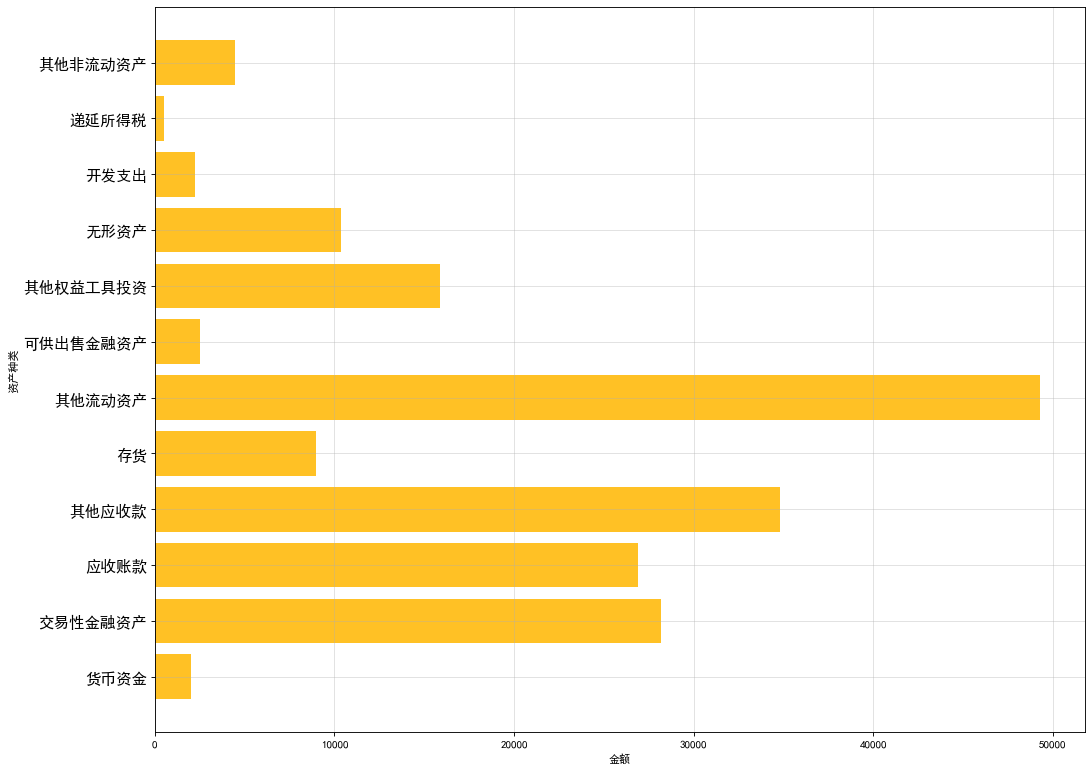

In [7]:
import pdfplumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re

txt_zh=''
with pdfplumber.open('G:\\金融数据获取与处理\\2019公司的年报\\300081：2019年年度报告.pdf') as pdf:
    for page in pdf.pages[16:17]:
        text = page.extract_text()
        if text != None:
            txt_zh +=  text

list=[]
d={}
d1={}
list=re.findall('\d+(?:,\d{3})*(?:\.\d+)*',txt_zh)
a=len(list) 
zc=['货币资金','交易性金融资产','应收账款','其他应收款','存货','其他流动资产','可供出售金融资产','其他权益工具投资','无形资产','开发支出','递延所得税','其他非流动资产']

for i in range(a):
    list[i]=list[i].replace(',','')
    list[i]=float(list[i])
    if list[i] < 500:
        list[i]=0
     
while 0 in list:
    list.remove(0)

b=len(list)
for j in range(b):
    d={zc[j]:list[j]}
    d1.update(d)

df=pd.DataFrame(d1,index=['资产分布']).T

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,12),dpi = 80)
a1 = range(len(zc))
plt.yticks(a1,zc,fontsize = 14)
plt.barh(a1,list,height=0.8,color = "#FFC125")
plt.xlabel('金额')  
plt.ylabel('资产种类')  
plt.grid(alpha = 0.4)
plt.show()

In [ ]:
#在这里，我提取了资产的数值，并通过条形图直观地看出他们的分布，可以看到在这个企业中，其他流动资产是占比最大，
#应收账款和其他应收款也占有较大比重，说明该企业是流动资产占比更多的企业，固定资产或无形资产占比较小，说明该企业对流动性资产的要求高。